## Assignment

In this assignment, we will derive and simulate the kinematic model for the alphabot using differential driven dynamics. By definition, **differential driven dynamics** refers to the motion of a system actuated by two separately driven wheels on either sides.  Note the following figure of a differential robot model.

**Part (a)**
Consider the configuration of the robot in the format  $[x,y,\alpha]^T$,
where $x,y$ are the $X$ and $Y$ coordinates of the robot's centroid in the cartesian plane and, $\alpha$ is the heading direction of the robot measured from the positive $X$ axis. Derive the differential equations for this dynamic model to update the 3 states. The final equations should look like the following.
$$\dot{x} = \frac{R}{2}(v_L + v_R)cos(\alpha)$$

$$\dot{y} = \frac{R}{2}(v_L + v_R)sin(\alpha)$$

$$\dot{\alpha} = \frac{R}{L}(v_R - v_L)$$

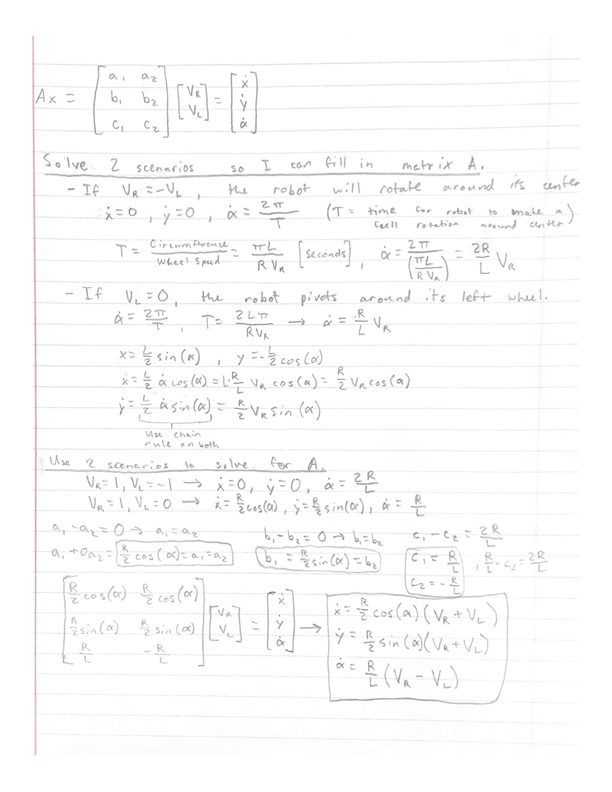

In [6]:
from IPython.display import Image# Load image from local storage
Image(filename = "math.png", width = 600, height = 300)



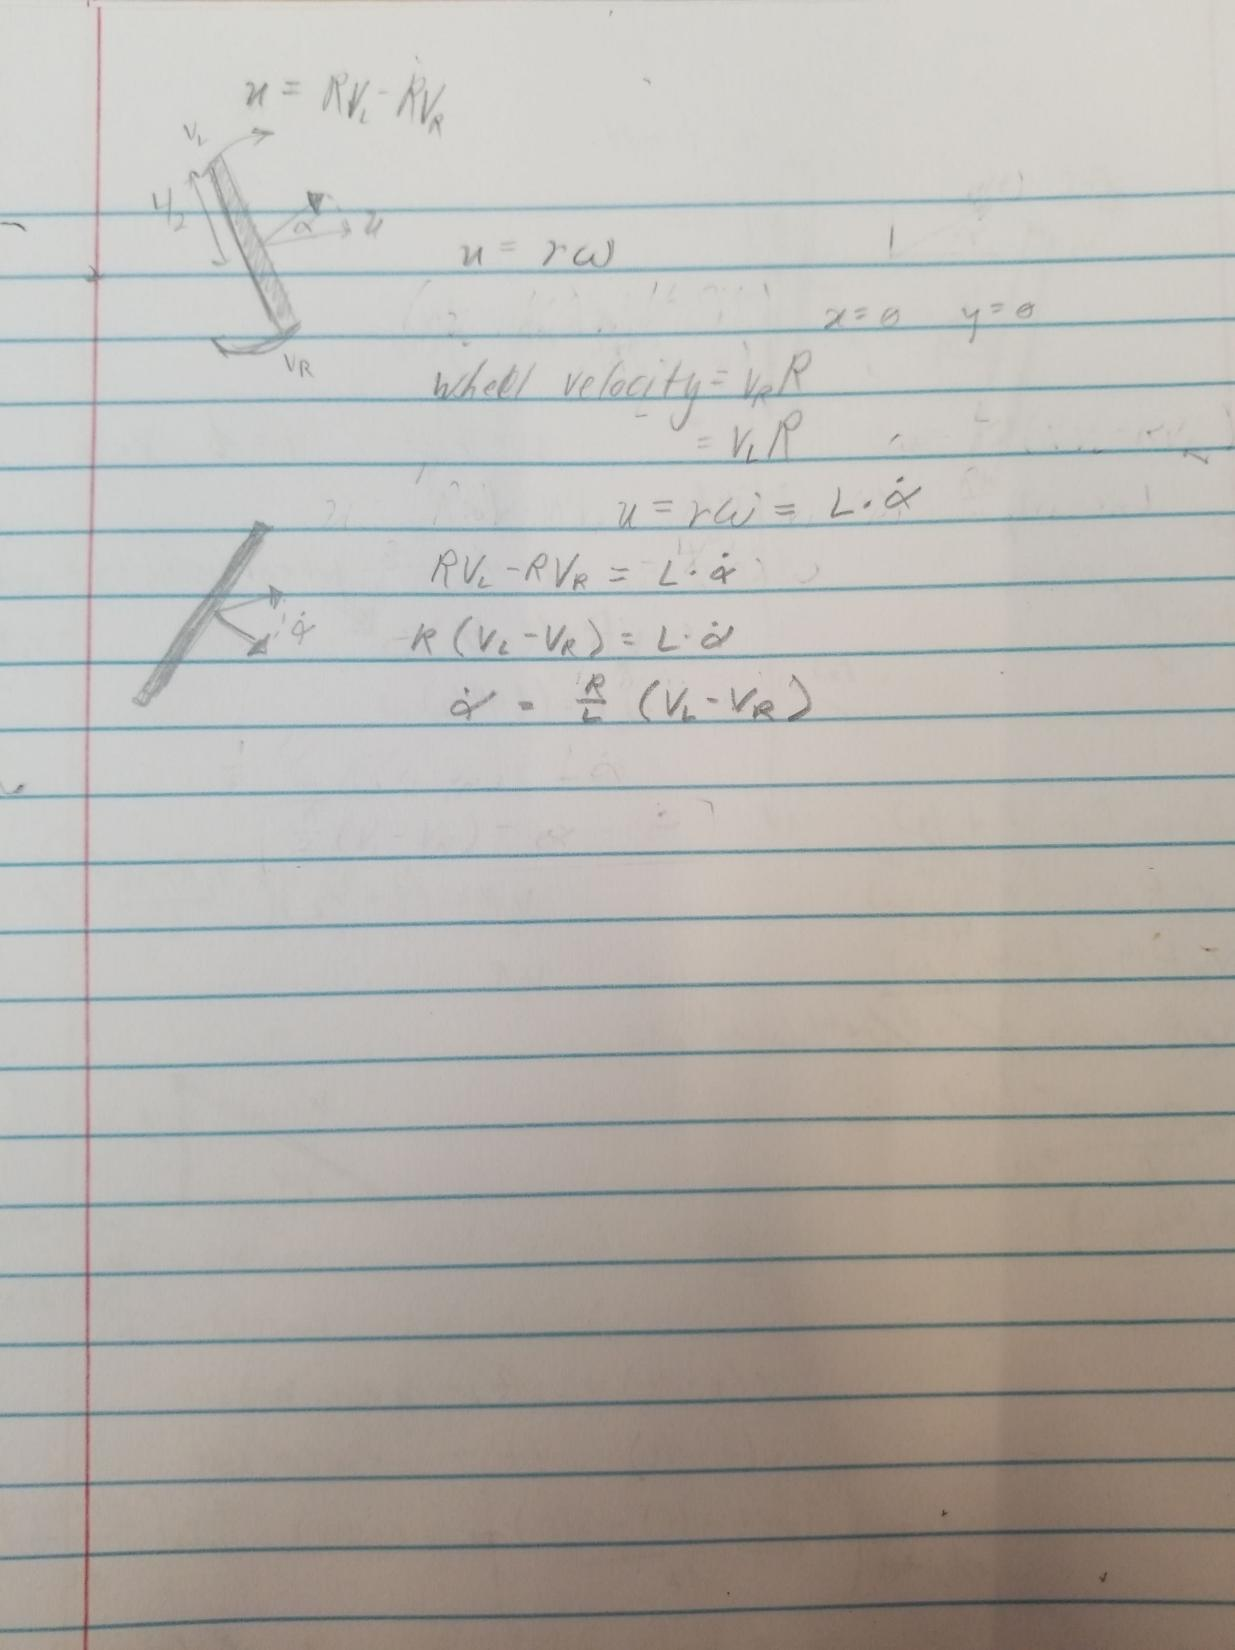

In [7]:
Image(filename = "Lab4_proofV21.jpeg", width = 600, height = 600) #Alternative proof method

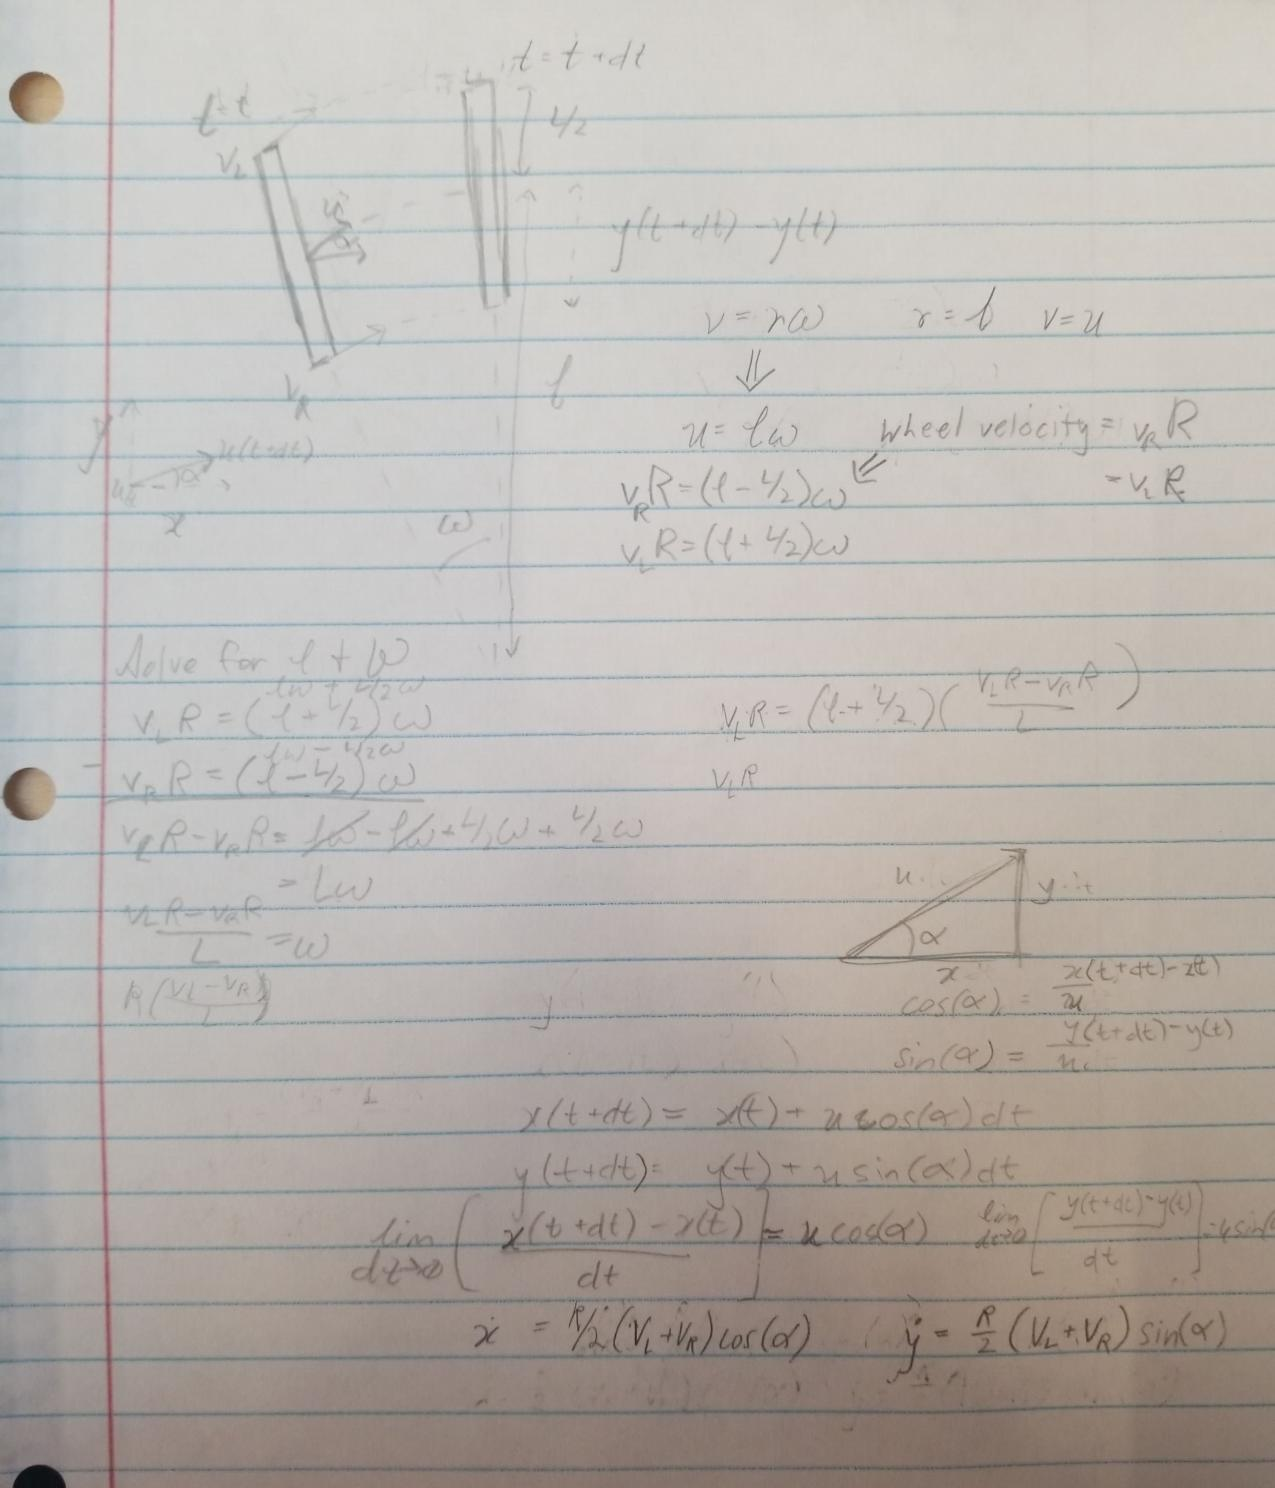

In [8]:
Image(filename = "Lab4_proofV22.jpeg", width = 600, height = 600)

**Part (b)** Implement the dynamic model using python. Include all the differential equations inside a single function called $f$. Obtain $L$ and $R$ parameters by measuring the alphabot.

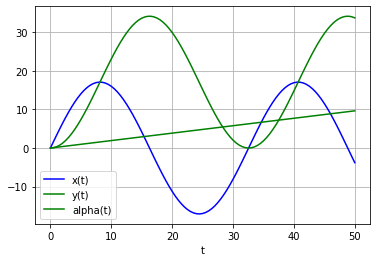

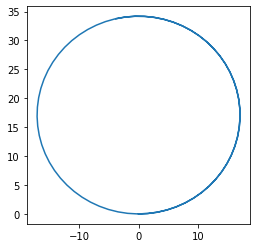

In [ ]:
import numpy as np
import math

L = 11.4
R = 2.2

def f(y,t,Vl,Vr): #y represents [dx/dt    input_vec represents [Vr
                               #              dy/dt                          Vl]
                               #              da/dt]
    alpha = y[2]
    L = 11.4
    R = 2.2
    dydt = [(R/2.0)*math.cos(alpha)*Vr + (R/2.0)*math.cos(alpha)*Vl,
            (R/2.0)*math.sin(alpha)*Vr + (R/2.0)*math.sin(alpha)*Vl,
            (R/L)*Vr - (R/L)*Vl]
    return dydt
t = np.linspace(0, 50, 101)
from scipy.integrate import odeint
y0 = [0,0,0]
sol = odeint(f, y0, t, args=(1, 2))

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.plot(t, sol[:, 2], 'g', label='alpha(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(4,4))
plt.plot(sol[:,0], sol[:,1])

**Part (c)** Pass $f$ to the ODEINT solver and simulate the system for 5 seconds by using $[x=0,y=0,\alpha=0]^T$ and $v_R = 1$, $v_L=2$ as the initial conditions. Plot the displacement values and angle over time.
(Refer to the particle dynamics on a 2D plane simulation code as an example.)

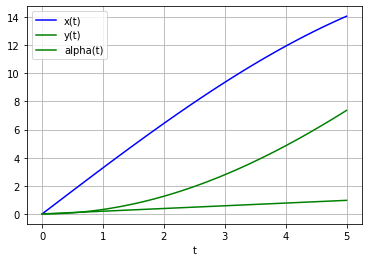

In [ ]:
t = np.linspace(0, 5, 101)

sol = odeint(f, y0, t, args=(1, 2))

plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.plot(t, sol[:, 2], 'g', label='alpha(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

**Part (d)** Lets define a trajectory for the robot by changing the angular velocity of the wheels at different timesteps. 

$$t = 0, v_R = 3, v_L = 1 $$

$$t = 5, v_R = 1, v_L = 3 $$

$$t = 10, v_R = 3, v_L = 1 $$

$$t = 15, v_R = 5, v_L = 5 $$

Visualize the robot and its path as it moves along this trajectory in real-time. (Use a rectangular shape to represent the robot).

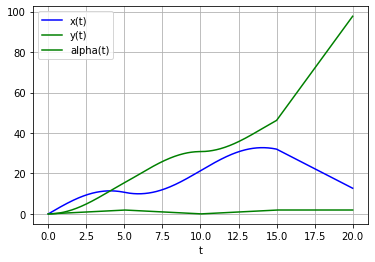

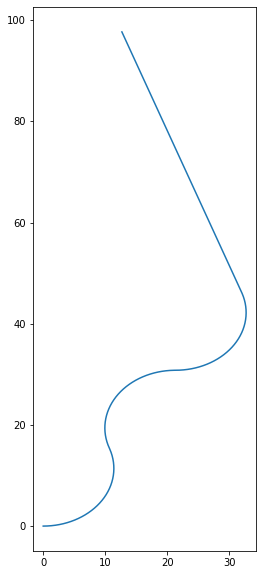

In [ ]:
y0 = [0,0,0]
t = np.linspace(0, 5, 101)
t2 = np.linspace(5, 10, 101)
t3 = np.linspace(10, 15, 101)
t4 = np.linspace(15, 20, 101)
t_total = np.append(np.append(t,t2),np.append(t3,t4))
sol = odeint(f, y0, t, args=(1, 3))

sol = np.append(sol,odeint(f, sol[-1], t2, args=(3, 1)), axis=0)

sol = np.append(sol,odeint(f, sol[-1], t3, args=(1, 3)), axis=0)
sol = np.append(sol,odeint(f, sol[-1], t4, args=(5, 5)), axis=0)

plt.plot(t_total, sol[:, 0], 'b', label='x(t)')
plt.plot(t_total, sol[:, 1], 'g', label='y(t)')
plt.plot(t_total, sol[:, 2], 'g', label='alpha(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(4,10))
plt.plot(sol[:,0], sol[:,1])

**Deliverables:** The completed python notebook. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

x = sol[:,0]
y = sol[:,1]
yaw = sol[:,2]
fig = plt.figure()
plt.axis('equal')
plt.grid()
ax = fig.add_subplot(111)
ax.set_xlim(-10, 100)
ax.set_ylim(-10, 100)
ax.plot(sol[:,0], sol[:,1])

patch = patches.Rectangle((0, 0), 0, 0, fc='y')

def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.set_xy([x[i], y[i]])
    patch.angle = np.rad2deg(yaw[i])
    patch.set_width(1.0)
    patch.set_height(10.0)
    return patch,

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(x),
                               interval=20,
                               blit=True)
plt.show()

anim.save('alphabot_motion.gif', writer='imagemagick')

![SegmentLocal](alphabot_motion.gif "segment")